In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
branches = pd.read_csv('Branches_with_demographics.csv')

In [3]:
# remove reference library because it's not a normal branch
branches = branches[branches.ID != 'TRL']

In [4]:
# convert text columns to floats
numeric_columns = ['Programs_Cultural_2015', 'Attendance_Cultural_2015',
                   'Programs_ESL_2015', 'Attendance_ESL_2015',
                   'Program_Info_Current_Issues_2015',
                   'Attendance_Info_Current_Issues_2015',
                   'Programs_Literacy_2015', 'Attendance_Literacy_2015',
                   'Programs_Literary_2015', 'Attendance_Literary_2015',
                   'Programs_User_Ed_2015', 'Attendance_User_Ed_2015',
                   'Programs_Cultural_2014', 'Attendance_Cultural_2014',
                   'Programs_ESL_2014', 'Attendance_ESL_2014',
                   'Programs_Info_Current_Issues_2014',
                   'Attendance_Info_Current_Issues_2014',
                   'Programs_Literacy_2014', 'Attendance_Literacy_2014',
                   'Programs_Literary_2014', 'Attendance_Literary_2014',
                   'Programs_User_Ed_2014', 'Attendance_User_Ed_2014',
                   'Workstations', 'WS_Users_2015', 'WS_Users_2014',
                   'WS_Users_2013', 'visits_2015', 'visits_2014', 'visits_2013',
                   'circulation_2015', 'circulation_2014', 'circulation_2013',
                   'collection_size', 'census_population', 'NPS_population',
                   'citizens', 'non_citizens', 'recent_immigrants',
                   'visible_minority', 'non_official_languages',
                   'in_labour_force', 'employed', 'unemployed',
                   'not_in_labour_force', 'low_income']
for col in numeric_columns:
    if branches[col].dtype == 'O':
        branches[col] = branches[col].astype('float')

In [5]:
# Calculate a couple of values
branches['sessions_per_ws'] = branches['WS_Users_2015'] / \
                              branches['Workstations']
branches['pct_low_income'] = branches['low_income'] / \
                             branches['census_population']
branches['ws_use_per_visit'] = branches['WS_Users_2015'] / \
                               branches['visits_2015']

<IPython.core.display.Javascript object>


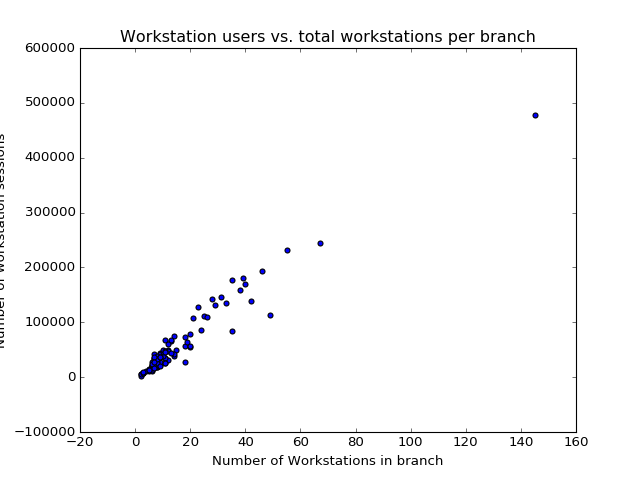

In [6]:
plt.scatter(branches['Workstations'], branches['WS_Users_2015'])
plt.title('Workstation users vs. total workstations per branch')
plt.xlabel('Number of Workstations in branch')
plt.ylabel('Number of workstation sessions')
plt.show()

<IPython.core.display.Javascript object>


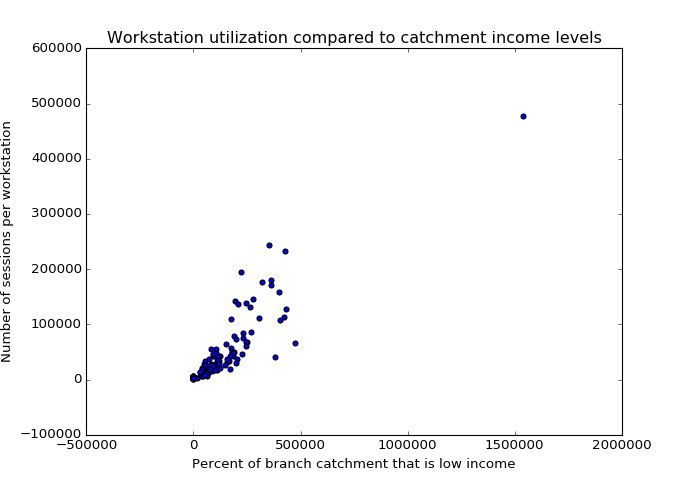

In [7]:
plt.scatter(branches['visits_2015'], branches['WS_Users_2015'])
plt.title('Workstation sessions vs. total visits')
plt.xlabel('Number of 2015 visits per branch')
plt.ylabel('Number of workstation users')
plt.show()

<IPython.core.display.Javascript object>


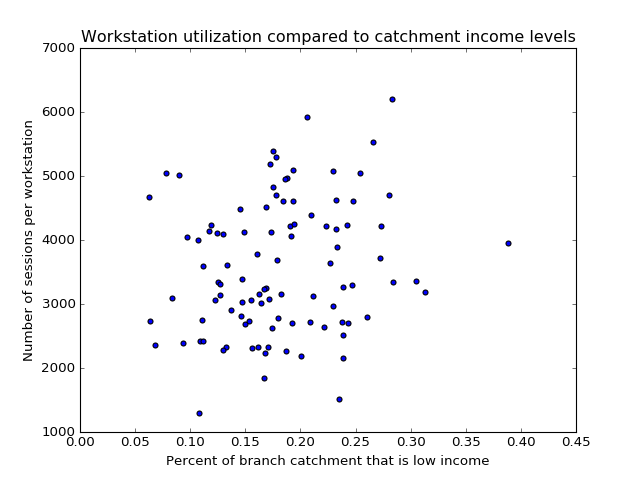

In [9]:
plt.scatter(branches['pct_low_income'], branches['sessions_per_ws'])
plt.title('Workstation utilization compared to catchment income levels')
plt.xlabel('Percent of branch catchment that is low income')
plt.ylabel('Number of sessions per workstation')
plt.show()

<IPython.core.display.Javascript object>


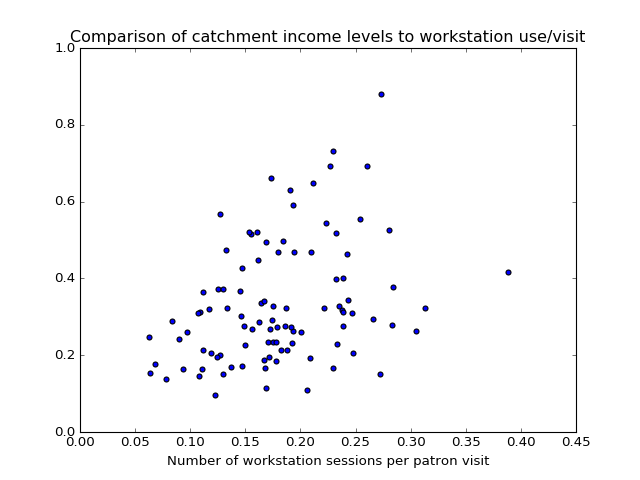

In [10]:
plt.scatter(branches['pct_low_income'], branches['ws_use_per_visit'])
plt.title('Comparison of catchment income levels to workstation use/visit')
plt.xlabel('Percent of branch catchment that is low income')
plt.xlabel('Number of workstation sessions per patron visit')
plt.show()